<a href="https://colab.research.google.com/github/mumng/Python-note/blob/master/240430_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%8B%9C%EA%B0%81%ED%99%94_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Seaborn

![seaborn](https://drive.google.com/uc?id=1j1ZM-tMaWYNCa_YkMGFIfymcrLS0MWG3)


- 엄청나게 화려한 시각화 기법들을 제공하며, 기본적으로 이쁩니다.
>  histplot, barplot, jointplot, lineplot, ...


- pandas DataFrame과 매우 호환이 잘 됩니다.

  >  e.g. sns.xxxplot(data=df)    **<--- 기본세팅!**

In [ ]:
# 라이브러리와 데이터를 불러오고, 시각화를 위한 세팅을 합니다.
import seaborn as sns
from seaborn import load_dataset
from seaborn import set_palette
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#cp = color_palette('Set2')
set_palette('Set2')
# set_palette(cp)

#data = pd.read_csv('./penguins.csv')
data = load_dataset('penguins').dropna()
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


### Histplot

- **연속형** 변수에 주로 사용
- 가장 기본적으로 사용되는 히스토그램을 출력하는 plot.


- 전체 데이터를 특정 구간별 정보를 확인할 때 사용합니다.

In [ ]:
# penguin 데이터에 histplot을 출력합니다.


### Displot

- distribution들을 여러 subplot들로 나눠서 출력해주는 plot.


- displot에 kind를 변경하는 것으로, histplot, kdeplot, ecdfplot 모두 출력이 가능합니다.

e.g. displot(kind="hist")

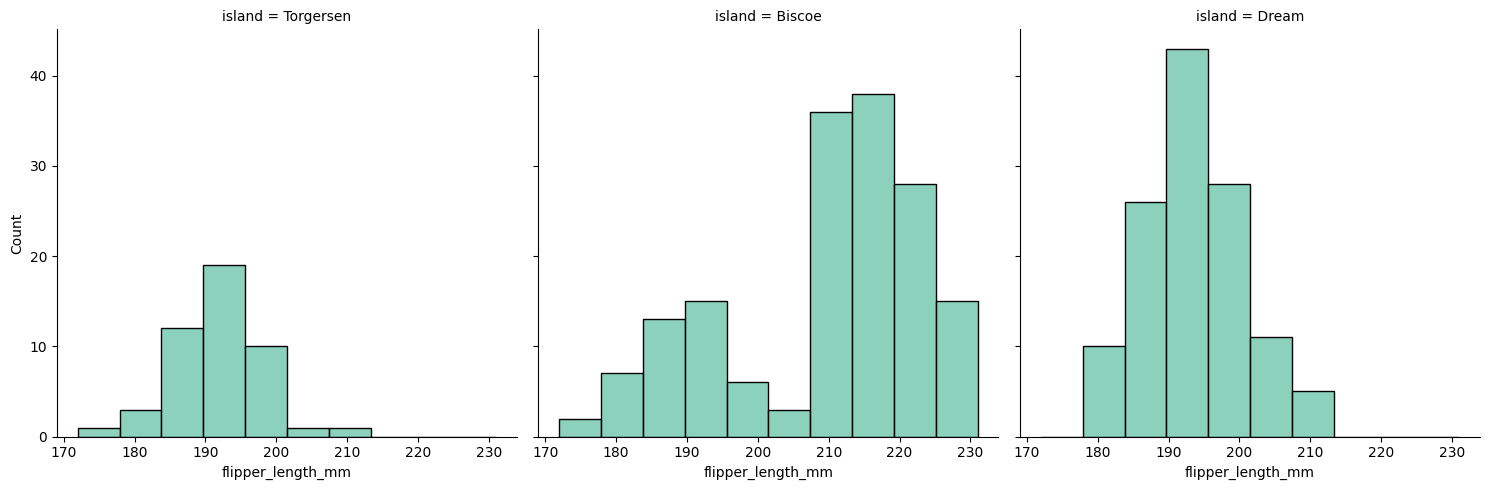

In [ ]:
# penguin 데이터에 displot을 출력합니다.
sns.displot(data=data, x="flipper_length_mm", kind='hist', col='island')

### Barplot

- 어떤 데이터에 대한 값의 크기를 막대로 보여주는 plot. (a.k.a. 막대그래프)


- 가로 / 세로 두 가지로 모두 출력 가능합니다.


- 히스토그램과는 다릅니다!

<Axes: xlabel='body_mass_g', ylabel='species'>

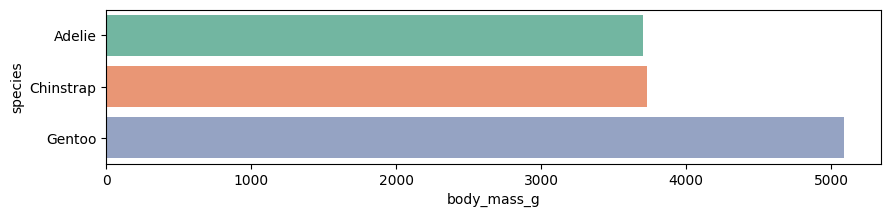

In [ ]:
# penguin 데이터에 barplot을 출력합니다.
plt.figure(figsize=(10,2))
#sns.barplot(data=data, x='species', y='body_mass_g', errorbar=None)
sns.barplot(data=data, y='species', x='body_mass_g', errorbar=None, hue='species', palette='Set2', color='Set3')

### Countplot

- **범주형** 속성을 가지는 데이터들의 histogram을 보여주는 plot.



- 종류별 count를 보여주는 방법입니다.

<Axes: xlabel='species', ylabel='count'>

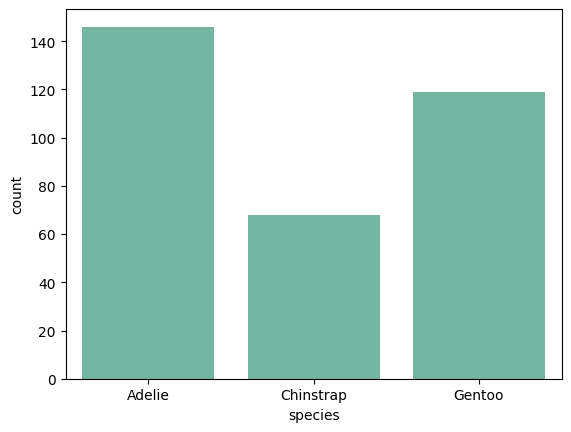

In [ ]:
# penguin 데이터에 countplot을 출력합니다.
sns.countplot(data=data, x='species')

### Boxplot


- 데이터의 각 종류별로 사분위 수(quantile)를 표시하는 plot.


- 특정 데이터의 전체적인 분포를 확인하기 좋은 시각화 기법입니다.


- box와 전체 range의 그림을 통해 outlier를 찾기 쉽습니다. (IQR : Inter-Quantile Range)

- 박스의 밑선은 25%, 중간선은 50%, 박스 윗선은 75% -> IQR 표현

- IQR 계산: IQR = 𝑄 3 − 𝑄 1
- 하한(lower bound) 계산: Lower Bound = 𝑄 1 − 1.5 × IQR Lower Bound=Q1−1.5×IQR
- 상한(upper bound) 계산: Upper Bound = 𝑄 3 + 1.5 × IQR Upper Bound=Q3+1.5×IQR

<Axes: xlabel='species', ylabel='body_mass_g'>

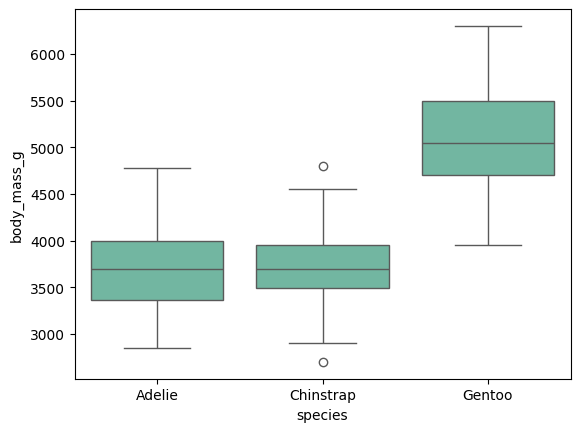

In [ ]:
# penguin 데이터에 boxplot을 출력합니다.
sns.boxplot(data=data, x='species', y='body_mass_g')
# What is boxplot?

### Violinplot

- 데이터에 대한 분포 자체를 보여주는 plot.


- boxplot과 비슷하지만, 전체 분포에 대한 그림을 보여준다는 점에서 boxplot과 다릅니다.


- 보통 boxplot과 함께 표시하면, 평균 근처에 데이터가 얼마나 있는지(boxplot) 전체적으로 어떻게 퍼져있는지(violinplot) 모두 확인이 가능합니다.

<Axes: xlabel='species', ylabel='body_mass_g'>

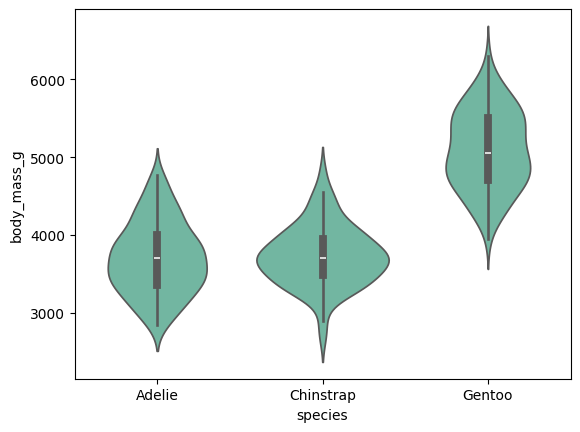

In [ ]:
# penguin 데이터에 violinplot을 출력합니다.
sns.violinplot(data=data, x='species', y='body_mass_g')

### Lineplot

- 특정 데이터를 x, y로 표시하여 관계를 확인할 수 있는 plot. (선 그래프)


- 수치형 지표들 간의 경향을 파악할 때 많이 사용합니다.

<Axes: xlabel='id', ylabel='body_mass_g'>

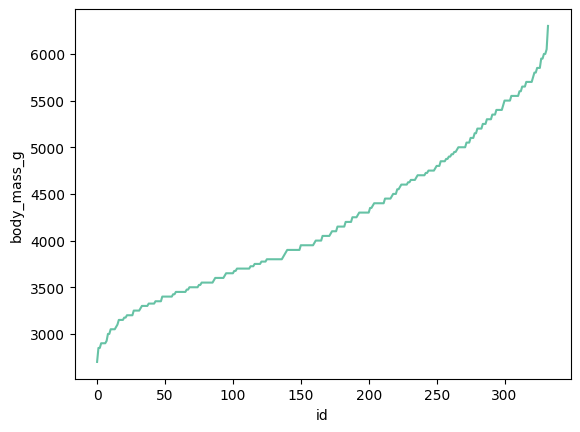

In [ ]:
# penguin 데이터에 lineplot을 출력합니다.

temp = data.sort_values(by='body_mass_g')
temp['id'] = np.arange(len(temp))
sns.lineplot(data=temp, x='id', y='body_mass_g')

### Pointplot

- 특정 수치 데이터를 error bar와 함께 출력해주는 plot.



- 수치 데이터를 다양한 각도에서 한 번에 바라보고 싶을 때 사용합니다.


- 데이터와 error bar를 한 번에 찍어주기 때문에, 살펴보고 싶은 특정 지표들만 사용하는 것이 좋습니다.

In [ ]:
# penguin 데이터에 pointplot을 출력합니다.


### Scatterplot

- lineplot과 비슷하게 x, y에 대한 전체적인 분포를 확인하는 plot.


- lineplot은 경향성에 초점을 둔다면, scatterplot은 데이터 그 자체가 퍼져있는 모양에 중점을 둡니다.

<Axes: xlabel='bill_length_mm', ylabel='flipper_length_mm'>

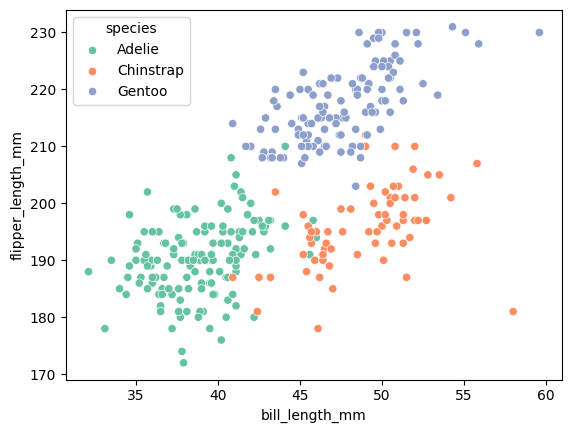

In [ ]:
# penguin 데이터에 scatterplot을 출력합니다.
sns.scatterplot(data=data, x='bill_length_mm', y='flipper_length_mm', hue='species')

### Pairplot


- 주어진 데이터의 각 feature들 사이의 관계를 표시하는 Plot.


- scatterplot, FacetGrid, kdeplot을 이용하여 feature간의 관계를 잘 보여줍니다.


- 각 feature에 대해 계산된 모든 결과를 보여주기 때문에, feature가 많은 경우 사용하기 적합하지 않습니다.

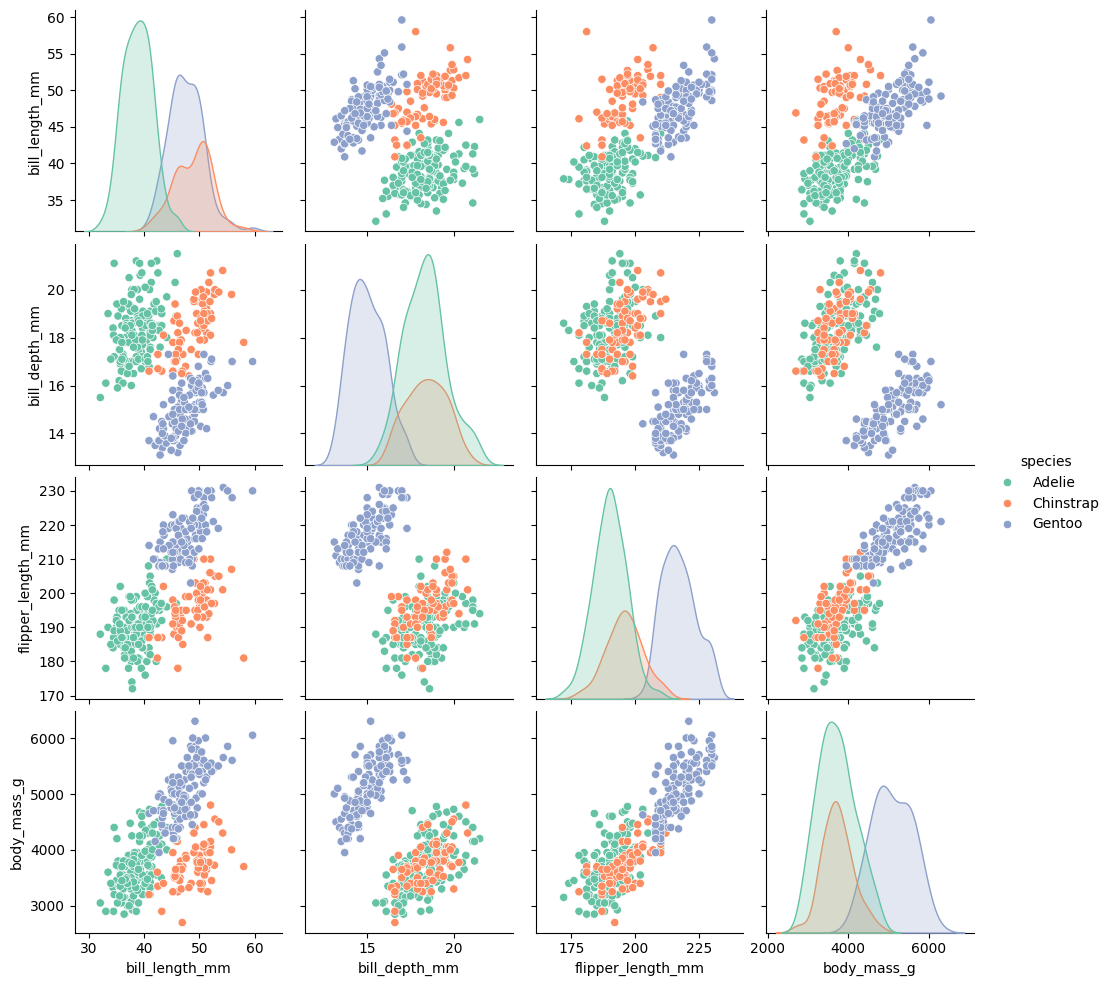

In [ ]:
# penguin 데이터에 pairplot을 출력합니다.
sns.pairplot(data=data, hue='species')

### Heatmap

- 정사각형 그림에 데이터에 대한 정도 차이를 색 차이로 보여주는 plot.


- 말 그대로 heatmap이기 때문에, 열화상카메라로 사물을 찍은 것처럼 정보의 차이를 보여줍니다.


- pairplot과 비슷하게 feature간 관계를 시각화할 때 많이 사용합니다.

**상관관계란?**
- 어떤 X값의 변화에 따라 Y값의 선형적으로 변화하는지를 측정한 지표.

- [-1, 1]


e.g. 아이스크림 판매량 증가 <----> 상어에 물린 사람 수

In [ ]:
# 각 feature간 상관관계를 파악하기 위해 Correlation matrix를 만듭니다.
corr = data.corr(numeric_only=True)
corr

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


<Axes: >

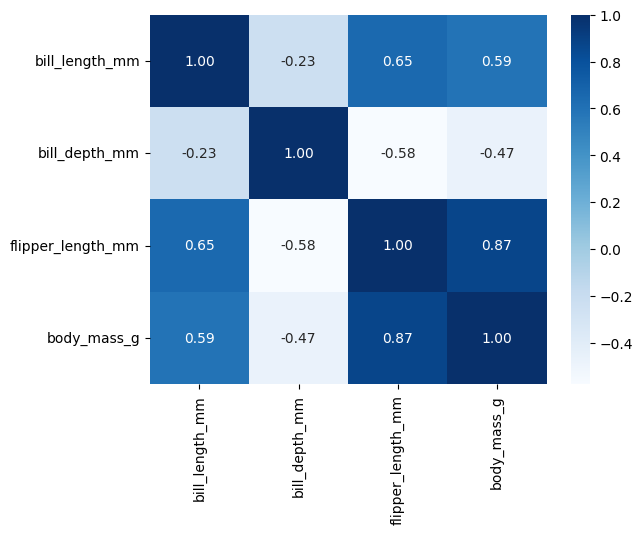

In [ ]:
# penguin 데이터에 heatmap을 출력합니다.
sns.heatmap(data=corr, annot=True, fmt='.2f', cmap='Blues')